# Στοχαστικές Διαδικασίες 
## 3η Εργαστηριακή Άσκηση
## Λεωνίδας Αβδελάς, 03113182

### Ερωτήσεις κατανόησης

1. *Γιατί σε λογαριθμική κλίμακα βλέπουμε μια ευθεία;*
Βλέπουμε ευθεία, γιατί λογαριθμώντας το $32x^3$, παίρνουμε $3 \log{32x}$ το οποίο είναι ανάλογο του $\log{x}$.

2. *Εκτιμήστε γραφικά την κλίση της ευθείας και το σημείο που τέμνει τον άξονα $logx=0$.*
Η κλίση της ευθείας είναι περίπου 3. Το σημείο που τέμνει τον άξονα $logx=0$ είναι περίπου το σημείο $y = 2^5$.

3. *Δοκιμάστε να κατασκευάσετε ίδιο γράφημα τις γραφικές παρατάσεις των συναρτήσεων $y = 8x^3$ και $y = 8x^2$. Πως αλλάζει η κλίση για τις 2 αυτές συναρτήσεις;*

Η κλίση για την $y=8x^3$ είναι ίδια και ίση με 3, ενώ για την $y= 8x^2$ είναι 2.

In [17]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code
from simple_markov_chain_lib import markov_chain

# to plot the results in the notebook:
%matplotlib inline

In [18]:
# Create a list of real numbers from start to end by step
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]
# Compute f(x) = 32 * x^3 for every element of x
y1 = 8 * x**3
y2 = 8 * x**2

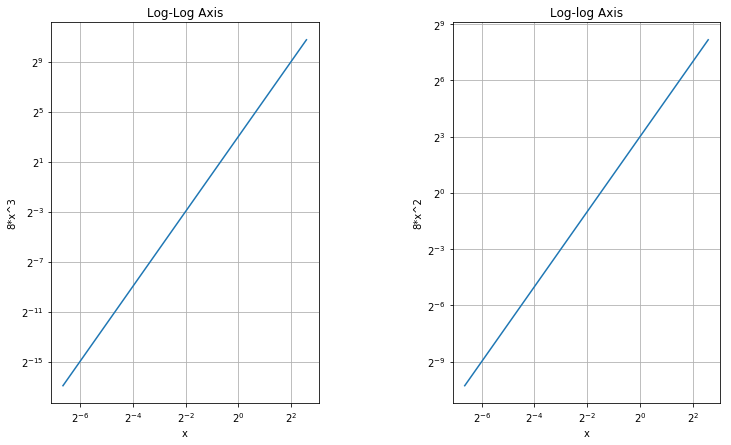

In [19]:
plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.loglog(x, y1, basex=2, basey=2)
plt.xlabel('x')
plt.ylabel('8*x^3')
plt.title('Log-Log Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y2, basex=2, basey=2)
plt.xlabel('x')
plt.ylabel('8*x^2')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

## Παραδοτέο 1

In [20]:
def create_tennis_chain(p_a):
    
    p_b = 1 - p_a
    
    init_probs_2  = {'0-0':1}

    P_table = {
        '0-0': {'15-0':p_a, '0-15':p_b},
        '15-0': {'30-0':p_a, '15-15':p_b},
        '0-15': {'15-15': p_a, '0-30':p_b},
        '30-0': {'40-0': p_a, '30-15': p_b},
        '15-15': {'30-15': p_a, '15-30': p_b},
        '0-30': {'15-30': p_a, '0-40': p_b},
        '40-0': {'GameA': p_a, '40-15': p_b},
        '30-15': {'40-15': p_a, 'Deuce': p_b},
        '15-30': {'Deuce': p_a, '15-40': p_b},
        '0-40': {'15-40': p_a, 'GameB': p_b},
        '40-15': {'GameA': p_a, 'AdvA': p_b},
        '15-40': {'AdvB': p_a, 'GameB': p_b},
        'Deuce': {'AdvA': p_a, 'AdvB': p_b},
        'GameA': {'GameA': 1},
        'AdvA': {'GameA': p_a, 'Deuce': p_b},
        'AdvB': {'Deuce': p_a, 'GameB': p_b},
        'GameB': {'GameB': 1}
    }

    mc2 = markov_chain(P_table, init_probs_2)
    return mc2


In [25]:
x_axis = np.linspace(0.0, 1.0, 100)
y_axis = []

for p_a in x_axis:
    
    mc2 = create_tennis_chain(p_a)
    
    ## Experiment parameters
    N = 10000     # number of samples
    steps = 25    # the target time
    counter = 0  # to count the number of times the event {X_GameA  = 1} occurs

    ## Simulation
    for i in range(N):
        mc2.start()  # new experiment
        for j in range(steps):  mc2.move()
        if mc2.running_state == 'GameA':  counter += 1

    phat = counter / N
    y_axis.append(phat)



Text(0.5, 1.0, 'Probability of GameA happening')

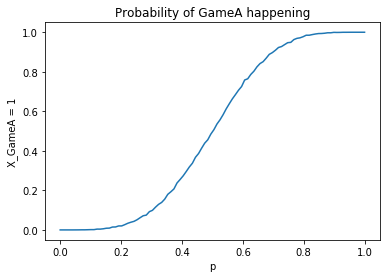

In [26]:
plt.figure()
plt.plot(x_axis, y_axis)
# Specify some extra attributes
plt.xlabel('p')
plt.ylabel('X_GameA = 1')
plt.title('Probability of GameA happening')

### Γραμμική Παρεμβολή 

The line that fits the data is y = 3.0 *x + 5.0 .


<function matplotlib.pyplot.show(*args, **kw)>

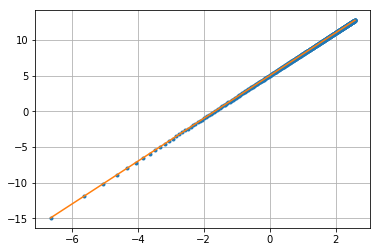

In [27]:
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]
# Compute f(x) = 32 * x^3 for every element of x
y = 32 * x**3

newx = np.log2(x)
newy = np.log2(y)

z = np.polyfit(newx, newy, 1)
print('The line that fits the data is y =', np.round(z[0]), '*x +', np.round(z[1]),'.')
      
p = np.poly1d(z)

plt.plot(newx, newy, '.', newx, p(newx), '-')
plt.grid(True)
plt.show